# Danceability & Valence analysis of the Playlist

### How are these variables represented in the 100 most streamed songs?

##### Danceability:
Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

#### Valence: 
A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

Both of these variables are created using Spotify's own algorithms.

In [1]:
# Import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
from scipy.stats import linregress

# Grab the spotify data file and describe relevant columns
df = pd.read_csv("spotify-data.csv", converters ={'artist_genres':eval})
df[["danceability", "valence"]].describe()

,danceability,valence
count,100.000000,100.000000
mean,0.669580,0.499670
std,0.136443,0.216499
min,0.351000,0.059000
25%,0.588000,0.338500
50%,0.689000,0.481500
75%,0.765000,0.662250
max,0.921000,0.931000


Both values are on a scale of 0 to 1, so their metrics can be compared:
 - The danceability metrics (mean: 0.67, median: 0.69) are higher than the valence (mean: 0.50, median: 0.48)
 - As the mean & median values for each variable is very similar, this suggests that the data is evenly spread/symmetrical
 
A boxplot explains the distribution further:

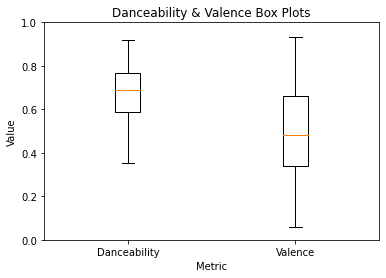

In [2]:
# Boxplot to explore the Danceability & Valence of the top songs
danceability = list(df.danceability)
valence = list(df.valence)
plt.boxplot([danceability, valence], labels=["Danceability", "Valence"])
plt.ylim(0, 1)
plt.ylabel("Value")
plt.xlabel("Metric")
plt.title("Danceability & Valence Box Plots")
plt.show()

 - The whisker distribution of the danceability plot suggests that the top streamed songs are more danceable (min: 0.35)
 - However, valence is much more varied. A popular song does not necessarily need to be a happy one

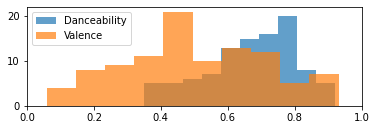

In [3]:
population1 = danceability
population2 = valence

# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population1, alpha=0.7, label="Danceability")
plt.hist(population2, alpha=0.7, label="Valence")
plt.xlim(0,1)
plt.legend()

A histogram can also explain the distribution of the two variables. As mentioned above, the similar mean and median shows a fairly symmetrical distrubition for each variable. Valence peaks around 0.4, whereas danceability peaks around 0.8.

The next step is to confirm whether danceability and valence are correlated in any way. It would be expected that the happier a song sounds, the more danceable it would be.

R squared: 0.24273631673402907
R value: 0.49268277495162044


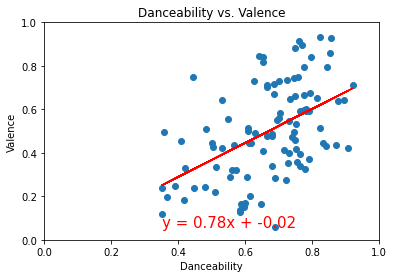

In [4]:
# Create x and y values
x_values = df["danceability"]
y_values = df["valence"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(x_values.min(),y_values.min()),fontsize=15,color="red")

# Label plot
plt.xlabel("Danceability")
plt.ylabel("Valence")
plt.title("Danceability vs. Valence")
plt.ylim(0, 1)
plt.xlim(0, 1)

# Print r square value
print(f"R squared: {rvalue**2}")
print(f"R value: {rvalue}")

# Show and save plot
plt.show()

As expected, as the danceability level rises so does the valence, however only with a correlation of 0.49 (a moderate correlation). An r-squared value of 0.24 shows that a linear regression does not strongly fit this distribution.

Examples of songs that don't fit the line:
 - High Valence, Low Danceability: Shawn Mendes - Treat You Better (Danceability: 0.44, Valence: 0.75)
 - High Danceability, Low Valence: Kendrick Lamar - HUMBLE. (Danceability: 0.91, Valence: 0.42)
 
Examples of songs that fit the model well:
 - Low Valence, Low Danceability: Billie Eilish - when the party's over (Danceability: 0.37, Valence: 0.20)
 - High Valence, High Danceability: XXXTENTACION - Moonlight (Danceability: 0.90, Valence: 0.71)